# Exercise4

In [4]:
#!pip install matplotlib

## Setups

start iPython interface in Inline Pylab mode

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


import pandas, numpy and matplotlib so we can use them

In [94]:
#!pip install pandas
import pandas as pd
import numpy as np
import matplotlib as plt

read the data from file

In [95]:
df = pd.read_csv("./data/train.csv")

## Exploration the data

First, look at the 10 records in the table to see how it is structured

In [96]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


now let's look at the summary of numerical fields by using describe() function

In [97]:
df.describe() # get the summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


we can see for example that Credit_history contains number 0-1 by seeing the min and max columns

we also can look how much there are null for each attribute by doing this:

In [98]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Distribution analysis

now we will study distribution of various variables
we will start by plotting the histogram of ApplicantIncome using the following commands:

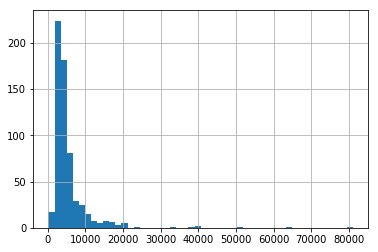

In [99]:
df['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values and most of the value is lower than 10000
Next, we look at box plots to understand the distributions. Box plot can be plotted by:

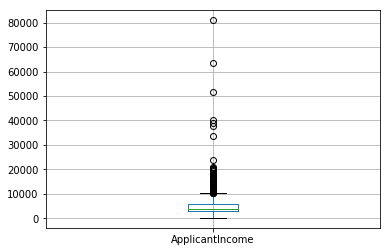

In [100]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

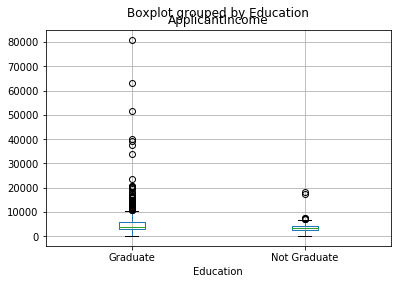

In [101]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers. 

now we will plot the histogram and boxplot of LoanAmount

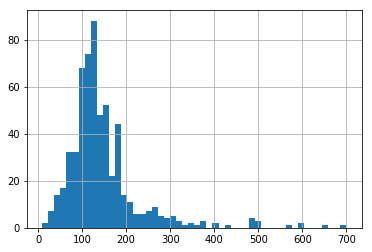

In [102]:
df['LoanAmount'].hist(bins=50)

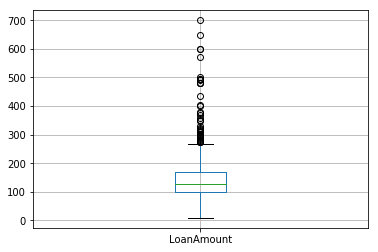

In [103]:
df.boxplot(column='LoanAmount')

we see that most of the loan amount is between 100 to 200

## fill missing values in LoanAmount

we already know the attributes that contain null, so let's explore them to see  the best way to fill them let's start with LoanAmount and self employed.

In [104]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

we can see here that the most common value is "No" so it is safe to impute the missing values as “No” as there is a high probability of success.

In [105]:
df['Self_Employed'].fillna('No',inplace=True)

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features

In [106]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


Define function to return value of this pivot_table:

In [107]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

Replace missing values:

In [108]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

## treat for extreme values in distribution of LoanAmount and ApplicantIncome

we don't want that some extreme value will affect the analyzes for example:
some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect

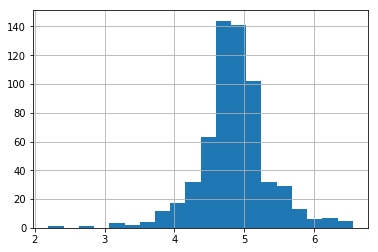

In [109]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

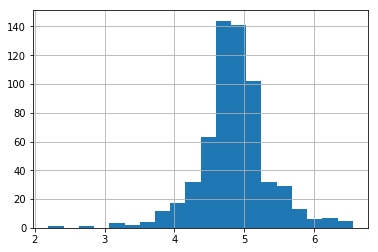

In [110]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

## Remove nulls

we will continue to remove null to the other attributes

In [111]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

for Credit History the value "1" will work because this value is the most common.

In [112]:
df['Credit_History'].fillna(1, inplace=True)

In [113]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

for Dependents the value "0" will work.

In [114]:
df['Dependents'].fillna(0, inplace=True)

In [115]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

for Married the value "Yes" will work.

In [116]:
df['Married'].fillna('Yes', inplace=True)

In [117]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

for Gender the value "Male" will work.

In [118]:
df['Gender'].fillna('Male', inplace=True)

loan Amount term is numeric attribute so we will enter 50% value we can see that in df.describe() command.

In [119]:
df['Loan_Amount_Term'].fillna(360, inplace=True)

now let's see again on the null value

In [120]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

## Building a Predictive Model in Python

After, we have made the data useful for modeling, let’s now look at the python code to create a predictive model on our data set. Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose and we will follow the trail.

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code:

In [121]:
!pip install -U scikit-learn
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

Requirement already up-to-date: scikit-learn in c:\programdata\anaconda3\envs\tensorflow\lib\site-packages


In [122]:
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Next, we will import the required modules. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores.

In [123]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

## Testing

first we need to read the test file:

In [124]:
test_df = pd.read_csv("data//test.csv")

we nead to do all the preperation also to test_df like we did to df: 

fill missing values in LoanAmount:

In [125]:
test_df['Self_Employed'].fillna('No',inplace=True)
table = test_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
test_df['LoanAmount'].fillna(test_df[test_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

treat for extreme values in distribution of LoanAmount and ApplicantIncome:

In [126]:
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['TotalIncome_log'] = np.log(test_df['TotalIncome'])



Remove nulls:

In [127]:
test_df['Credit_History'].fillna(1, inplace=True)
test_df['Dependents'].fillna(0, inplace=True)
test_df['Married'].fillna('Yes', inplace=True)
test_df['Gender'].fillna('Male', inplace=True)
test_df['Loan_Amount_Term'].fillna(360, inplace=True)
test_df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

change test_df to numeric types:

In [128]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    test_df[i] = le.fit_transform(test_df[i].astype(str))
test_df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
dtype: object

we will create an fuction that will predict with the test.csv and get the solution.

In [129]:


def submit_model_for_loan_id(model, df, predict, name):
    predictions = model.predict(df[predict])
    submit = df['Loan_ID']
    predictions = pd.DataFrame(predictions)
    submit = pd.concat([submit, predictions], names=['Loan_ID', 'Loan_Status'], axis=1)
    submit.columns = ['Loan_ID', 'Loan_Status']
    codeDict = {0:'N',1:'Y'}
    for key, value in codeDict.items():
        submit["Loan_Status"].replace(key, value, inplace=True)   
    submit.to_csv('solutions//' + name, index=False)


##  1: KNeighbors

we will use in model KNeighbors with 3 neigbers.

In [130]:
from sklearn.neighbors import KNeighborsClassifier
outcome_var='Loan_Status'
model = KNeighborsClassifier(3)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Loan_Amount_Term']
classification_model(model, df,predictor_var,outcome_var)


Accuracy : 85.016%
Cross-Validation Score : 77.037%


now let's wrte in file:

In [131]:
submit_model_for_loan_id(model,test_df,predictor_var,'KNeighbors.csv')

##  2: SVC

we will use the linear model that  we learn it in class

In [132]:
from sklearn import svm, datasets
model = svm.SVC(gamma=2, C=3)
outcome_var='Loan_Status'

predictor_var = ['Gender', 'Married', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 75.903%


now let's wrte in file:

In [138]:
submit_model_for_loan_id(model,test_df,predictor_var,'SVC.csv')

## GradientBoostingClassifier

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.


In [139]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=30)
outcome_var='Loan_Status'

predictor_var = ['Gender', 'Married', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.225%
Cross-Validation Score : 79.484%


now let's wrte in file:

In [140]:
submit_model_for_loan_id(model,test_df,predictor_var,'GradientBoostingClassifier.csv')

my best result i get from the svc:
0.784722222222

![Image of result](images/result.png)